## Machine Learning for Regression Homework

In [4]:
import pandas as pd
import numpy as np
from IPython.display import display

## Data preparation

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.shape

(20640, 10)

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#Feature that has misssing values is "total_bedrooms"

## Exploratory data analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

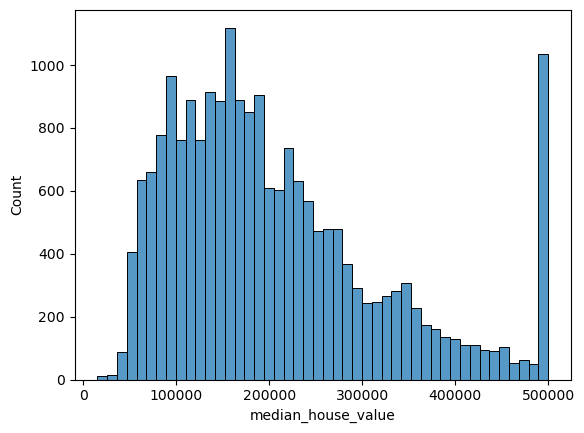

In [14]:
sns.histplot(df.median_house_value);   # it does have a long tail as the distribution is left skewed

## Subsetting of data

In [15]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
df_subset = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]
df_subset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [31]:
df_subset.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [6]:
df_final = df_subset[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value']]
df_final.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [7]:
len(df_final)

15687

In [8]:
df_final.isnull().sum()   # total_bedroom has missing values

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [29]:
df_final.population.describe()  # 50% percentile for "population" feature is 1195

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Setting up the validation framework

In [7]:
n = len(df_final)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
print(n)

15687


In [8]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [9]:
df_train = df_final.iloc[idx[:n_train]]
df_val = df_final.iloc[idx[n_train:n_train+n_val]]
df_test = df_final.iloc[idx[n_train+n_val:]]

print(f"Length of df_train: {len(df_train)}, df_val: {len(df_val)}, df_test: {len(df_test)}")
print(f"Length of Entire Data {len(df_train) + len(df_val) + len(df_test)}")

Length of df_train: 9413, df_val: 3137, df_test: 3137
Length of Entire Data 15687


In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [12]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Collection of functions used in the course of the homework

In [13]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)    
    return w_full[0], w_full[1:]

def RSME(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)    
    return w_full[0], w_full[1:]


def data_prep(df, seed_num):
    n = len(df)
    idx = np.arange(n)
    np.random.seed(seed_num)
    np.random.shuffle(idx)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)    

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9413 non-null   float64
 1   longitude           9413 non-null   float64
 2   housing_median_age  9413 non-null   float64
 3   total_rooms         9413 non-null   float64
 4   total_bedrooms      9319 non-null   float64
 5   population          9413 non-null   float64
 6   households          9413 non-null   float64
 7   median_income       9413 non-null   float64
dtypes: float64(8)
memory usage: 588.4 KB


In [14]:
# Question 3
# Training the model and getting the RSME for filling with O

X_train = df_train.fillna(0).values
y = y_train

w0, w = train_linear_regression(X_train, y_train)
print("w0: ", w0)
print("w: ", w)

#Predict Price using X_val and fillna(0)

X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)

rsme = RSME(y_val, y_pred)
print()
print("RMSE: ", round(rsme, 2))

w0:  -9.763249478171275
w:  [-2.68233309e-01 -2.55938802e-01  1.77710730e-03 -3.38393956e-05
  2.93766352e-04 -1.52190447e-04  3.96908643e-04  1.80600946e-01]

RMSE:  0.34


In [15]:
#Question 3
# Training the model and getting the RSME for filling with mean

mean_value = df_train.total_bedrooms.mean()

X_train = df_train.fillna(mean_value).values
y = y_train

w0, w = train_linear_regression(X_train, y_train)
print("w0: ", w0)
print("w: ", w)

#Predict Price using X_val and fillna(mean)

mean_value = df_val.total_bedrooms.mean()
X_val = df_val.fillna(mean_value).values
y_pred = w0 + X_val.dot(w)

rsme = RSME(y_val, y_pred)
print()
print("RMSE: ", round(rsme, 2))

w0:  -9.886133216346906
w:  [-2.68652914e-01 -2.57026361e-01  1.79880767e-03 -3.87631029e-05
  3.78806885e-04 -1.49641599e-04  3.25344392e-04  1.81951358e-01]

RMSE:  0.34


In [ ]:
#Question 3
# Conclusion: both are equal for RMSE filling with mean and zero(0)

In [16]:
# QUESTION 4:

X_train = df_train.fillna(0).values
y = y_train

X_val = df_val.fillna(0).values

grid = []

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y, r)

    y_pred = w0 + X_val.dot(w)
    score = RSME(y_val, y_pred)
    grid.append([r, score])
    
grid_table = pd.DataFrame(grid, columns = ["r", "RMSE_score"])
display(grid_table)
print()
print("Best RMSE: ", round(grid_table.RMSE_score.min(), 2))

RMSE_list  = list(grid_table.RMSE_score)
idx = RMSE_list.index(min(RMSE_list))

print("Best r: ", grid_table.r[idx])

,r,RMSE_score
0,0.000000,0.340848
1,0.000001,0.340848
2,0.000100,0.340848
3,0.001000,0.340851
4,0.010000,0.340878
5,0.100000,0.341286
6,1.000000,0.344896
7,5.000000,0.347740
8,10.000000,0.348315



Best RMSE:  0.34
Best r:  0.0


In [17]:
# QUESTION 5

grid_RMSE = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = data_prep(df_final, seed)
       
    X_train = df_train.fillna(0).values
    y = y_train

    w0, w = train_linear_regression(X_train, y)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)

    rsme = RSME(y_val, y_pred)
    grid_RMSE.append([rsme, seed])
    
print("Calculated RMSE for different Seed")
rmse_table = pd.DataFrame(grid_RMSE, columns = ["RMSE", "SEED"])
display(rmse_table)
list_cal_RMSE = list(rmse_table["RMSE"])
print()
print("Standard Deviation for RMSE: ", round(np.std(list_cal_RMSE), 3))

Calculated RMSE for different Seed


,RMSE,SEED
0,0.337739,0
1,0.337800,1
2,0.338429,2
3,0.332005,3
4,0.339445,4
5,0.343382,5
6,0.338533,6
7,0.346875,7
8,0.351274,8
9,0.334156,9



Standard Deviation for RMSE:  0.005


In [16]:
# QUESTION 6

seed = 9
r = 0.001

df_train, df_val, df_test, y_train, y_val, y_test = data_prep(df_final, seed)

df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])


df_full_train = df_full_train.reset_index(drop=True)

X_train = df_full_train.fillna(0).values
y = y_full_train

w0, w = train_linear_regression_reg(X_train, y, r)

X_val = df_test.fillna(0).values
y_pred = w0 + X_val.dot(w)

rsme = RSME(y_test, y_pred)

print("RSME: ", round(rsme, 2))

RSME:  0.33
